In [1]:
import pandas as analytics
from model_builder import model_builder
from nltk.corpus import conll2000
from locations import conll_8k_modelname

2024-04-18 21:14:16.174149: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-18 21:14:17.023915: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
sentences = conll2000.sents()
corpus = [' '.join(sentence) for sentence in sentences]
df_corpus = analytics.DataFrame(data = {'data':corpus})
df_corpus = df_corpus.sample(frac = 0.8)
len(df_corpus)

8758

In [3]:
training = 0.7
training_set = int(training * len(df_corpus))
df_corpus = df_corpus.sample(frac = 1)
df_train = df_corpus[:training_set]
df_test = df_corpus[training_set:]

In [4]:
architecture = {
    "model" : None,
    "embedding_dimension" : 50,
    "type_of_cells" : "gru",
    "number_of_cells" : 60,
    "dropout_percentage" : 0.5,
    "max_epochs" : 60
}
data = {
    "train":df_train,
    "test":df_test
}


Extracting training corpus ....  Training corpus extracted successfully !


Tokenising the corpus .... 
Total Number of Unique Words [VOCABULARY] : 12806
Corpus be tokenised successfully !


Generating input sequence ....  Input sequence generated successfully !
Optimal Sequence Length : 43


Compiling model ....  Modelled compiled successfully with GRU cells!
Fit for training ! Training can be done !!!


2024-04-18 21:14:20.267891: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


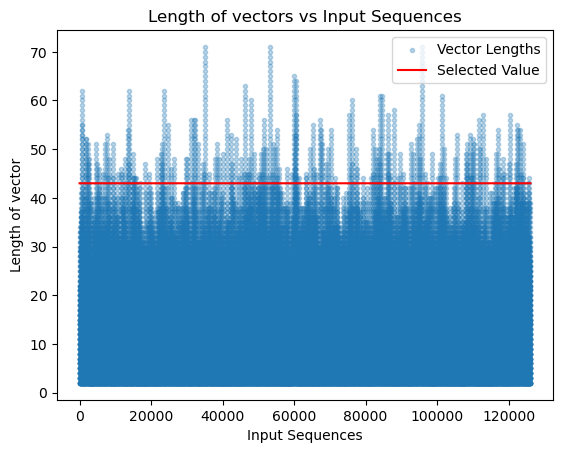

In [5]:
mb = model_builder(architecture = architecture, data = data)

In [6]:
mb.train_model()

Epoch 1/60
3941/3941 ━━━━━━━━━━━━━━━━━━━━ 87s 21ms/step - accuracy: 0.0545 - loss: 7.5201
Epoch 2/60
3941/3941 ━━━━━━━━━━━━━━━━━━━━ 85s 22ms/step - accuracy: 0.0866 - loss: 6.7021
Epoch 3/60
3941/3941 ━━━━━━━━━━━━━━━━━━━━ 85s 22ms/step - accuracy: 0.1126 - loss: 6.2549
Epoch 4/60
3941/3941 ━━━━━━━━━━━━━━━━━━━━ 85s 21ms/step - accuracy: 0.1285 - loss: 5.9493
Epoch 5/60
3941/3941 ━━━━━━━━━━━━━━━━━━━━ 85s 22ms/step - accuracy: 0.1384 - loss: 5.7519
Epoch 6/60
3941/3941 ━━━━━━━━━━━━━━━━━━━━ 85s 21ms/step - accuracy: 0.1482 - loss: 5.5766
Epoch 7/60
3941/3941 ━━━━━━━━━━━━━━━━━━━━ 85s 21ms/step - accuracy: 0.1517 - loss: 5.4469
Epoch 8/60
3941/3941 ━━━━━━━━━━━━━━━━━━━━ 85s 22ms/step - accuracy: 0.1585 - loss: 5.3258
Epoch 9/60
3941/3941 ━━━━━━━━━━━━━━━━━━━━ 85s 21ms/step - accuracy: 0.1624 - loss: 5.2202
Epoch 10/60
3941/3941 ━━━━━━━━━━━━━━━━━━━━ 85s 21ms/step - accuracy: 0.1693 - loss: 5.1259
Epoch 11/60
3941/3941 ━━━━━━━━━━━━━━━━━━━━ 85s 22ms/step - accuracy: 0.1724 - loss: 5.0527
Epoch 12

In [7]:
mb.test_model()

1600/1600 ━━━━━━━━━━━━━━━━━━━━ 17s 10ms/step - accuracy: 0.1532 - loss: 6.4973
Loss in testing : 6.508
Accuracy in testing :0.149


In [8]:
mb.model.save(conll_8k_modelname)